In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
print ("sdhdftg")
from face_embeddings import Get_Face_Embedding,getEmbedding


sdhdftg


c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Model filename: 20170512-110547/20170512-110547.pb


In [4]:
folder_path = r'C:\Users\Sachin\Desktop'

if not os.path.isdir(folder_path):
    folder_path = r'C:\Users\Sachin13390\Desktop'


In [5]:
global haar_face_cascade
haar_face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_alt.xml')

In [6]:
def Get_Face_Cordinates_From_Image(Grey_Image):
    
    faces = haar_face_cascade.detectMultiScale(Grey_Image, scaleFactor=1.1, minNeighbors=5);
    
    return faces
    

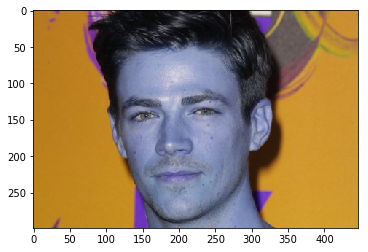

In [7]:
image_Path = folder_path + "\Python_Practice_Files\Face_Data\grant-gustin.jpg"

image = cv2.imread(image_Path)
plt.imshow(image)

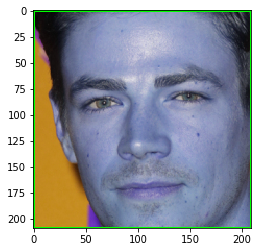

In [8]:
faces = Get_Face_Cordinates_From_Image(image)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    image = image[y:y+h,x:x+w]
    plt.imshow(image)
    
#plt.imshow((image))

In [9]:
face_Embedding = ''
image = cv2.resize(image, (160,160),interpolation=cv2.INTER_CUBIC)
face_Embedding = getEmbedding(image)

print (face_Embedding.tolist())
#print (type(face_Embedding.tolist()))

[[-0.03051653318107128, 0.05047687888145447, 0.028036607429385185, 0.06504954397678375, 0.09113801270723343, 0.06172531843185425, 0.12569643557071686, -0.030497180297970772, -0.08671356737613678, -0.08385029435157776, 0.03512665629386902, -0.14108064770698547, -0.08402613550424576, 0.10720911622047424, -0.10187476873397827, -0.054746661335229874, 0.06392660737037659, -0.1341928392648697, 0.009908899664878845, -0.052573055028915405, -0.037218786776065826, -0.14115265011787415, 0.07008396834135056, 0.08418802917003632, 0.05355270579457283, 0.18630371987819672, 0.145537868142128, 0.012637339532375336, -0.009917780756950378, -0.14795905351638794, 0.06039472669363022, 0.09815663844347, -0.01889033429324627, 0.00664750300347805, -0.015437750145792961, 0.06324011087417603, 0.13075007498264313, -0.07852161675691605, 0.11273571848869324, 0.02722018025815487, -0.02785504050552845, -0.009897853247821331, -0.014692454598844051, -0.04213159158825874, -0.041624464094638824, 0.11125046759843826, 0.04

In [10]:
Image_Dataset_Path = folder_path + '\\' + "Face_Data"

print (Image_Dataset_Path)

list_Image_Fetaure = []
total_Image_Count = 0


C:\Users\Sachin13390\Desktop\Face_Data


In [11]:
for root, dirs, files in os.walk(Image_Dataset_Path, topdown=True):
    for name in files:
        total_Image_Count = total_Image_Count + 1
        
print (total_Image_Count)

8


In [26]:
temp_Count = 0
list_Image_Fetaure = []
error_Count = 0

for root, dirs, files in os.walk(Image_Dataset_Path, topdown=True):

    for folder in dirs:
        
        for root_Path, folder_Path, image_Files in os.walk(os.path.join(root, folder), topdown=True):
            
            for image in image_Files:
                if temp_Count < 15000:
                    
                    try:
                        image_Path = os.path.join(root_Path, image)
                        #face_Embedding = Get_Face_Embedding (new_Face_Path)
                        image = cv2.imread(image_Path)
                        faces = Get_Face_Cordinates_From_Image(image)
                        
                        for (x, y, w, h) in faces:
                            image = image[y:y+h,x:x+w]
                            face_Embedding = ''
                            image = cv2.resize(image, (160,160),interpolation=cv2.INTER_CUBIC)
                        
                        face_Embedding = getEmbedding(image)
                        
                        print (folder)
                        
                        list_Image_Fetaure.append((folder, face_Embedding.tolist()))                      
                        
                    except:
                        print ("Error Found at " + str(temp_Count))
                        error_Count = error_Count + 1
                        error_Count
                        
                    
                    if temp_Count % 100 == 0:
                        print ("---------------   " + str(temp_Count) + " / " + str(total_Image_Count))
                        
                    temp_Count = temp_Count + 1
                        #print (temp_Count)
                    

print ("Total errors " + str(error_Count))
    

Abhishek
---------------   0 / 8
Abhishek
Error Found at 2
Error Found at 3
Error Found at 4
Error Found at 5
Ronak
Ronak
Total errors 4


In [31]:
image_Path = folder_path + "\\abhi3.jpg"
print(image_Path)
image = cv2.imread(image_Path)

faces = Get_Face_Cordinates_From_Image(image)
                        
for (x, y, w, h) in faces:
    face_Embedding = ''
    image = image[y:y+h,x:x+w]
    image = cv2.resize(image, (160,160),interpolation=cv2.INTER_CUBIC)

face_Embedding = getEmbedding(image)

#print(face_Embedding)

threshold = 0.5
for face_encoding in list_Image_Fetaure:
    #print (face_encoding)
    s=1
    distance = np.linalg.norm(face_encoding[1] - face_Embedding, axis=1)
    if distance < threshold:
        y=0
        print ("Person can be   " +  str(face_encoding[0]) + "  " + str(distance[0]))

C:\Users\Sachin13390\Desktop\abhi3.jpg
Person can be   Abhishek  0.49823628147932997
Person can be   Ronak  0.3290183957881688


In [ ]:
list_Image_Fetaure = []
csv_File_Path = folder_path+ "\Face_Embeddings.csv"

with open(csv_File_Path) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        print (row[1])
        list_Image_Fetaure.append((row[0],row[1]))

[[0.02048071287572384, 0.13933256268501282, 0.00543082132935524, 0.01973571442067623, 0.0012499868171289563, 0.03665931150317192, 0.11828399449586868, -0.08999098092317581, -0.09808143973350525, -0.08865062892436981, -0.07564316689968109, -0.08416863530874252, -0.018922535702586174, 0.07861408591270447, 0.026931654661893845, -0.0595129132270813, 0.022723186761140823, -0.13971352577209473, 0.07264519482851028, -0.1131429597735405, -0.054151371121406555, -0.12845531105995178, 0.08712978661060333, 0.09041304141283035, 0.1175217479467392, 0.16152435541152954, 0.11562611162662506, 0.09821652621030807, -0.09895928204059601, -0.17568856477737427, -0.05678196996450424, 0.10514091700315475, -0.08372137695550919, 0.12169761955738068, -0.00748393265530467, 0.006649880204349756, 0.12474698573350906, -0.09600226581096649, 0.13468322157859802, 0.015567724592983723, -0.00556457694619894, 0.01876596361398697, -0.07716797292232513, -0.028160400688648224, 0.0011609512148424983, 0.12844009697437286, 0.03

[[0.04547763243317604, 0.08329973369836807, 0.046762995421886444, 0.017628517001867294, 0.024687226861715317, 0.08693984150886536, 0.08910811692476273, -0.06792572885751724, -0.09813745319843292, -0.14701774716377258, 0.03616847097873688, -0.14156107604503632, -0.08794143795967102, 0.052212171256542206, -0.05070825293660164, -0.12022829055786133, 0.05918247625231743, -0.14731866121292114, -0.0029749565292149782, -0.1289241760969162, -0.032534096390008926, -0.15157654881477356, 0.07573965191841125, 0.035069119185209274, 0.06962712854146957, 0.17032767832279205, 0.09397924691438675, 0.08460613340139389, -0.07513588666915894, -0.17758165299892426, -0.003775733057409525, 0.1560373306274414, -0.06630495190620422, 0.023222345858812332, -0.017910582944750786, 0.010884290561079979, 0.14290805160999298, -0.06148099526762962, 0.17667870223522186, 0.06817653775215149, -0.006387299858033657, -0.02461297996342182, -0.009072092361748219, -0.08271801471710205, -0.004733460023999214, 0.158556699752807

[[0.018575428053736687, 0.09936541318893433, 0.01737118326127529, 0.022323256358504295, 0.050270479172468185, 0.07299790531396866, 0.07255993038415909, -0.07755918800830841, -0.04949754476547241, -0.1429060995578766, 0.04109206423163414, -0.09884700924158096, -0.07145633548498154, 0.07310724258422852, -0.040170229971408844, -0.1264265775680542, 0.05561041459441185, -0.14281125366687775, 0.017492838203907013, -0.09980800747871399, 0.007132616359740496, -0.20193570852279663, 0.01685657724738121, 0.07347457110881805, 0.05623732879757881, 0.15717579424381256, 0.11397597193717957, 0.042961955070495605, -0.08158967643976212, -0.17372053861618042, -0.0036194443237036467, 0.1556415855884552, -0.09941145777702332, 0.051848892122507095, -0.03659769892692566, 0.048332586884498596, 0.134870246052742, -0.11882904171943665, 0.12006053328514099, 0.06267724931240082, 0.02840222418308258, 0.010603605769574642, 0.004720965400338173, -0.053801923990249634, -0.05402768403291702, 0.1459096372127533, 0.0774

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [52]:
print (len(list_Image_Fetaure))

13023


In [18]:
threshold = 0.26

new_Face_Path = folder_path + "\Python_Practice_Files\Face_Data\GG.jpg"

image = cv2.imread(new_Face_Path)

faces = Get_Face_Cordinates_From_Image(image)
for (x, y, w, h) in faces:
    image = image[y:y+h,x:x+w]

face_Embedding = ''
image = cv2.resize(image, (160,160),interpolation=cv2.INTER_CUBIC)
face_Embedding = getEmbedding(image)

#print("hiohiohoh \n\n\n")
face = Get_Face_Embedding (new_Face_Path)
#print (type(face))
#print (face[0]['embedding'])
#print("\n\n\n")

for (name, embedding) in list_Image_Fetaure:
    
    distance = np.linalg.norm(embedding - face_Embedding)
    distance = np.linalg.norm(face_encodings - face_to_compare, axis=1)
    
    if distance < threshold:
        y=0
        #print ("Person can be  " + name + "   " +  str(distance))
    

TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U2773') dtype('<U2773') dtype('<U2773')

In [53]:
X=[]
y=[]

face_Names=[]
label_Names = []

count = 0

for (name, embedding) in list_Image_Fetaure:
    
    if not name in face_Names:
        face_Names.append( name)
        label_Names.append((count , name))
        count = count + 1

In [54]:
X=[]
y=[]

for (name, embedding) in list_Image_Fetaure:
    X.append(embedding[0])
    for label, face_name in label_Names:
        if name == face_name:
            y.append(label)
            
        

In [55]:
print (len(X))
print (type(X))

13023
<class 'list'>


In [56]:
print (len(y))
print (type(y))

13023
<class 'list'>


In [ ]:
from sklearn import svm

print (type(X))
print (type(y))

clf = svm.SVC()
clf.fit(X, y)  

In [97]:


clf.predict(face_Embedding)


array([1849])

In [ ]:
print (X)

In [99]:
print (face_Names[855])

Charles_Bronson
